In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics 
%matplotlib inline 

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
def read_rpkm_matrix(rpkm_file_path):
    # --------------------------------------
    # load count data and meta information
    # --------------------------------------
    n_header_lines = 1
    n_meta_fields = 4
    # 1. count number of genes
    rpkm_file = open(rpkm_file_path)
    num_genes = 0
    for (i, line) in enumerate(rpkm_file):
        if i == 0: # header line
            vals = line.rstrip().split('\t')
            num_features = len(vals)-n_meta_fields
        if i >= n_header_lines:
            num_genes += 1
    rpkm_file.close()
    print 'Reading: ' + rpkm_file_path
    print 'Number of genes: ' + str(num_genes)
    # 2. read the full rpkm matrix
    full_log_mtx = np.empty((num_genes, num_features))  # each row will be the feature profile for a given gene
    gene_info = ["NULL"]*num_genes
    print 'Reading:' + rpkm_file_path
    rpkm_file = open(rpkm_file_path)
    for (i, line) in enumerate(rpkm_file):
        vals = line.rstrip().split('\t')
        if i < n_header_lines: 
            first_fields = '\t'.join(vals[0:n_meta_fields]) # print header later
            tissues = vals[n_meta_fields:]
            continue
        idx = i - n_header_lines  # gene index 
        if (idx % 10000 == 0):
            print '    ' + str(idx) + ' genes read'
        gene_info[idx] = '\t'.join(vals[0:n_meta_fields])
        exp_levels = vals[n_meta_fields:]
        full_log_mtx[idx,:] = exp_levels 
    rpkm_file.close()
    print 'Completed reading full matrix. Dimensions: ' + str(full_log_mtx.shape)
    return full_log_mtx, gene_info, tissues


In [7]:
# load tissue median expression values from file
# filename = '../data/small_example_data/small_log_median_transcript_rpkm_in_go_nonzero_exp.txt'
filename = '../data/local_large/log_norm_median_transcript_rpkm_in_go_nonzero_exp.txt'
full_log_mtx, gene_info, tissues = read_rpkm_matrix(filename)
df = pd.DataFrame(data=full_log_mtx, index=gene_info, columns=tissues)
sorteddf = df.reindex_axis(sorted(df.columns), axis=1)
sorteddf.describe()


Reading: ../data/local_large/log_norm_median_transcript_rpkm_in_go_nonzero_exp.txt
Number of genes: 64429
Reading:../data/local_large/log_norm_median_transcript_rpkm_in_go_nonzero_exp.txt
    0 genes read
    10000 genes read
    20000 genes read
    30000 genes read
    40000 genes read
    50000 genes read
    60000 genes read
Completed reading full matrix. Dimensions: (64429, 53)


,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
count,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,...,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000,64429.000000
mean,-0.020426,-0.022369,-0.019896,-0.017666,-0.020880,-0.019374,-0.019529,-0.019394,-0.017046,-0.016435,...,-0.019846,-0.019431,-0.022369,-0.014043,-0.026676,-0.014638,-0.019718,-0.020135,-0.020439,-0.030355
std,0.978094,0.972866,0.981412,0.981438,0.976076,0.980676,0.983160,0.975139,0.979941,0.979590,...,0.978252,0.979851,0.969692,0.984313,0.966306,0.986280,0.979344,0.978729,0.972224,0.948429
min,-0.629253,-0.628285,-0.632953,-0.611729,-0.620853,-0.603770,-0.669341,-0.593953,-0.603157,-0.608020,...,-0.626562,-0.629129,-0.651281,-0.628632,-0.617417,-0.737329,-0.645355,-0.634107,-0.638542,-0.494821
25%,-0.628794,-0.627964,-0.632926,-0.611503,-0.620797,-0.603441,-0.669341,-0.593953,-0.603157,-0.608020,...,-0.626049,-0.628777,-0.650893,-0.628632,-0.616867,-0.736158,-0.645317,-0.634074,-0.638120,-0.494634
50%,-0.616303,-0.616103,-0.617038,-0.603396,-0.611755,-0.594102,-0.624998,-0.576964,-0.588857,-0.592907,...,-0.611656,-0.611609,-0.630350,-0.619653,-0.599248,-0.545864,-0.633979,-0.624723,-0.622979,-0.484642
75%,0.338840,0.333851,0.336852,0.302064,0.321641,0.280594,0.421684,0.251891,0.259788,0.286742,...,0.331293,0.336351,0.391098,0.371232,0.293970,0.504542,0.392438,0.364005,0.375116,-0.035949
max,7.808567,7.979884,8.461054,7.241814,7.341247,7.341022,7.688723,9.584028,9.260531,9.354841,...,8.090400,7.940229,8.313275,7.579458,8.979903,7.727013,7.847100,7.301806,7.407789,12.018367


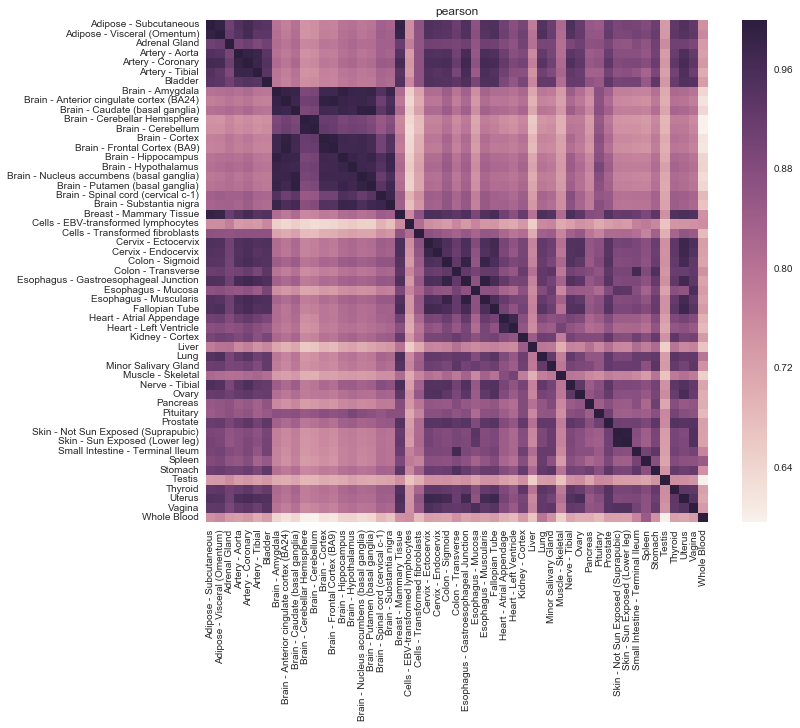

In [8]:
method = 'pearson' 
corrmat = sorteddf.corr(method)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, ax=ax)
ax.set_title(method)

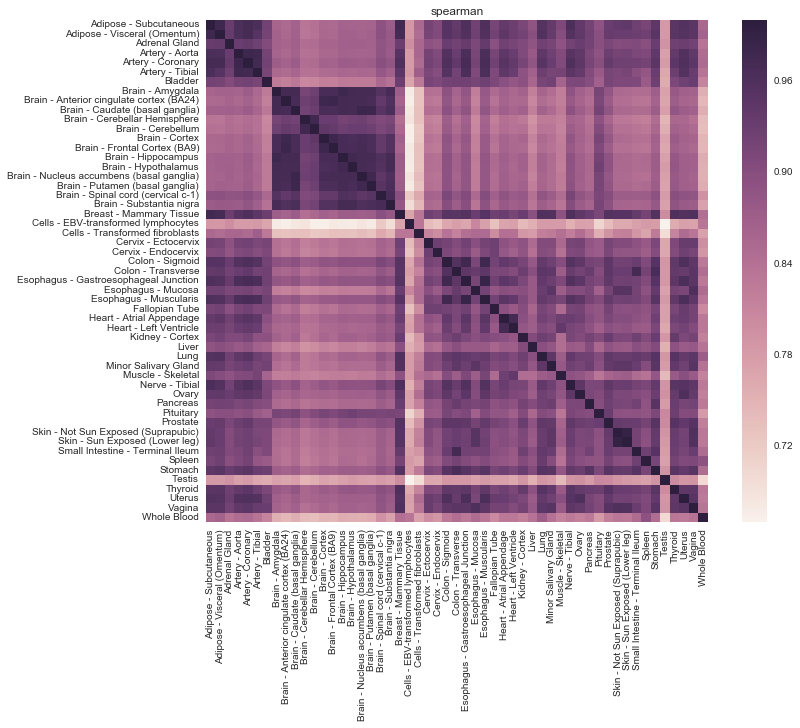

In [9]:
method = 'spearman' 
corrmat = sorteddf.corr(method)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, ax=ax)
ax.set_title(method)
